### Datasets

```
│physionet.org/files/circor-heart-sound/1.0.1
├─training_data
│	│     '13918.txt',
│	│     '13918_AV.hea',
│	│     '13918_AV.tsv',
│	│     '13918_AV.wav',
│	│     '13918_MV.hea',
│	│     '13918_MV.tsv',
│	│     '13918_MV.wav',
│	│    ...
│	
│  training_data.csv: label, other features
│
```

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats


In [2]:
import sys
sys.path.insert(0,'/home/ubuntu/hmd/notebooks')

In [3]:
root_dir = '/home/ubuntu/hmd/notebooks/physionet.org/files/circor-heart-sound/1.0.1'
training_data_file = root_dir + '/' + 'training_data.csv'
training_data_dir = root_dir + '/' + 'training_data'
model_dir = root_dir + '/' + 'model'

In [7]:
afile = "/home/jk21/Downloads/Data/data/murmur/test/33151_AV.wav"

In [4]:
import tensorflow as tf

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Wed Jul 20 14:58:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:01:00.0 Off |                  N/A |
| 38%   47C    P2    62W / 260W |  10525MiB / 11019MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)

2022-07-20 14:58:17.508095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 14:58:17.512575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 14:58:17.512773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [6]:
df = pd.read_csv(training_data_file)
df

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/hmd/notebooks/physionet.org/files/circor-heart-sound/1.0.1/training_data.csv'

In [7]:
# summary of NA's in each column
df.isnull().sum()

Patient ID                    0
Locations                     0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Campaign                      0
Additional ID               802
dtype: int64

In [12]:
df.head()

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


In [13]:
df['Locations'].value_counts()

AV+PV+TV+MV          586
AV+MV                115
PV+TV+MV              71
MV                    37
AV+PV+TV              29
AV+PV                 18
PV+TV                 14
AV+PV+MV              13
PV                    12
AV                     9
PV+MV                  7
AV+TV+MV               6
TV                     4
AV+PV+TV+TV+MV         4
AV+PV+TV+MV+MV         3
TV+MV                  2
AV+PV+MV+Phc+Phc       1
AV+AV+AV+MV            1
AV+AV+PV+TV+MV+MV      1
AV+PV+TV+MV+Phc        1
AV+MV+MV               1
AV+AV+MV+MV            1
AV+AV+MV               1
PV+TV+TV               1
AV+PV+PV+TV+TV+MV      1
AV+AV+PV+PV+TV+MV      1
AV+AV+PV+TV+MV         1
TV+MV+Phc              1
Name: Locations, dtype: int64

<AxesSubplot:>

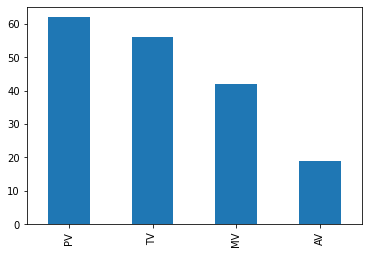

In [9]:
df['Most audible location'].value_counts().plot.bar()

<AxesSubplot:>

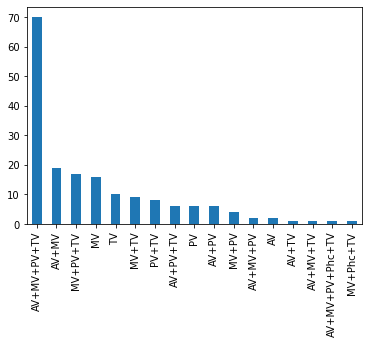

In [10]:
df['Murmur locations'].value_counts().plot.bar()

## wav feature engineering

In [18]:
fnms = os.listdir(root_dir + '/training_data')

In [20]:
fnms[:30]

['index.html',
 '13918.txt',
 '13918_AV.hea',
 '13918_AV.tsv',
 '13918_AV.wav',
 '13918_MV.hea',
 '13918_MV.tsv',
 '13918_MV.wav',
 '13918_PV.hea',
 '13918_PV.tsv',
 '13918_PV.wav',
 '13918_TV.hea',
 '13918_TV.tsv',
 '13918_TV.wav',
 '14241.txt',
 '14241_AV.hea',
 '14241_AV.tsv',
 '14241_AV.wav',
 '14241_MV.hea',
 '14241_MV.tsv',
 '14241_MV.wav',
 '14241_PV.hea',
 '14241_PV.tsv',
 '14241_PV.wav',
 '14241_TV.hea',
 '14241_TV.tsv',
 '14241_TV.wav',
 '14998.txt',
 '14998_AV.hea',
 '14998_AV.tsv']

In [21]:
os.listdir(root_dir)

['index.html',
 'training_data',
 'LICENSE.txt',
 'RECORDS',
 'SHA256SUMS.txt',
 'training_data.csv',
 'model']

In [35]:
fnms_wav = [ fnm for fnm in fnms if fnm.split('.')[1] == 'wav' ]

In [245]:
# Using wave library
import wave
import IPython.display as ipd  # To play sound in the notebook

fname = root_dir + '/training_data/' + fnms_wav[0]

wav = wave.open(fname)
print("Sampling rate: ", wav.getframerate(), "Hz")
print("Total samples: ", wav.getnframes(), "samples")
print("Duration:", wav.getnframes()/wav.getframerate(), "s")
print("Channels :", wav.getnchannels(), "channels")

ipd.Audio(fname, rate=4000)

Sampling rate:  4000 Hz
Total samples:  41152 samples
Duration: 10.288 s
Channels : 1 channels


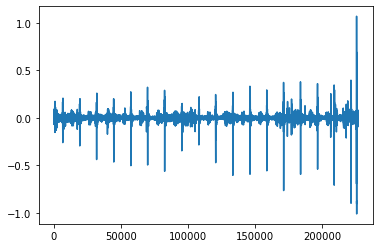

In [246]:
import librosa
import matplotlib.pyplot as plt

wav, label = librosa.load(fname)
plt.plot(wav)

In [247]:
len(wav)

226851

In [248]:
len(x)

258048

In [8]:
afile

'/home/jk21/Downloads/Data/data/murmur/test/33151_AV.wav'

In [10]:
import librosa

In [13]:
import soundfile as sf

In [21]:
x1 = librosa.load(afile,sr = 4000)[0]


In [22]:
x2 = sf.read(afile, dtype = 'int16')

In [23]:
x1

array([-0.0138855 ,  0.03079224,  0.02224731, ..., -0.0640564 ,
       -0.05892944, -0.05569458], dtype=float32)

In [24]:
x2

(array([ -455,  1009,   729, ..., -2099, -1931, -1825], dtype=int16), 4000)

In [26]:
x2[0] / 32768

array([-0.0138855 ,  0.03079224,  0.02224731, ..., -0.0640564 ,
       -0.05892944, -0.05569458])

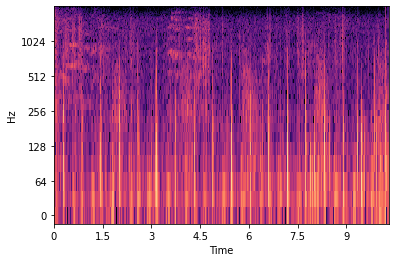

In [249]:
x = librosa.load(fname,sr = 4000)[0]
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)


librosa.display.specshow(log_spectrogram, sr=4000, hop_length=64, x_axis='time', y_axis='log')


In [250]:
log_spectrogram.shape

(65, 644)

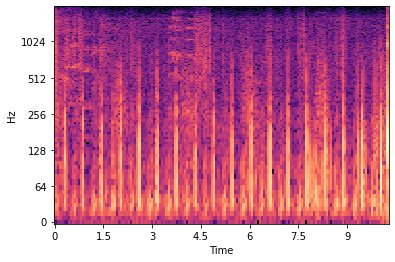

In [251]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=256, n_fft=512, win_length = 512)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

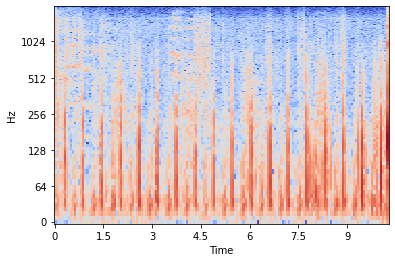

In [252]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=256, n_fft=512)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

In [111]:
S_db_hr.shape

(257, 161)

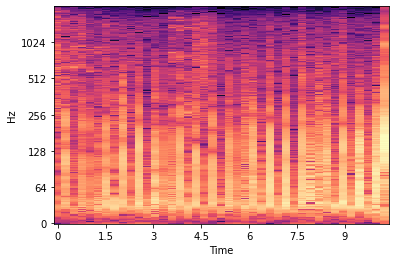

In [140]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=1024, n_fft=2048)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, sr= 4000, hop_length=1024, x_axis='time', y_axis='log',
                               ax=ax)

In [132]:
S_db_hr.shape

(1025, 222)

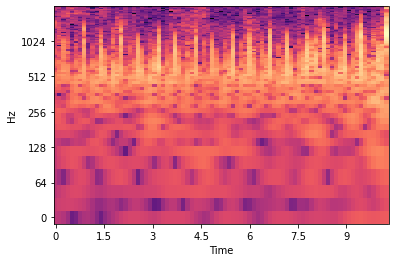

In [129]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x, fmin = 50, hop_length=512)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=512, x_axis='time', y_axis='log',
                               ax=ax)

In [130]:
S_db_hr.shape

(84, 81)

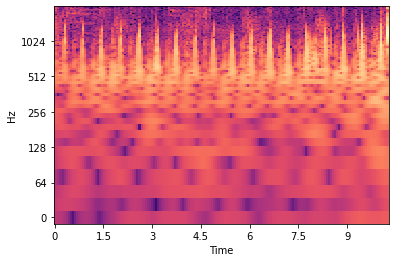

In [135]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x, fmin = 50, hop_length=256)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

In [136]:
S_db_hr.shape

(84, 161)

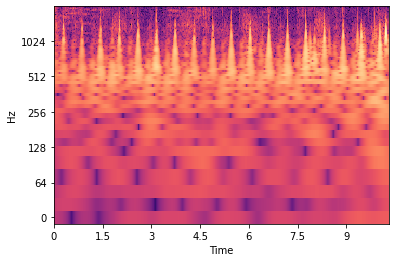

In [139]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x, fmin = 50, hop_length=64)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=64, x_axis='time', y_axis='log',
                               ax=ax)

In [138]:
S_db_hr.shape

(84, 644)

### Search for maximum length wav

In [41]:
len(fnms_wav)

3163

In [42]:
len1 = []
for fnm in fnms_wav :
    fname = root_dir + '/training_data/' + fnm
    wav, label = librosa.load(fname)
    len1.append(len(wav))

In [80]:
len1 = np.array(len1)

In [84]:
len1.max() / label   ## label is sampling rate

64.51201814058957

This one have about 1 minuite of data

In [85]:
len1.argmax()

1133

In [141]:
fname = root_dir + '/training_data/' + fnms_wav[1133]

wav = wave.open(fname)
print("Sampling rate: ", wav.getframerate(), "Hz")
print("Total samples: ", wav.getnframes(), "samples")
print("Duration:", wav.getnframes()/wav.getframerate(), "s")
print("Channels :", wav.getnchannels(), "channels")

ipd.Audio(fname, rate=4000)

Sampling rate:  4000 Hz
Total samples:  258048 samples
Duration: 64.512 s
Channels : 1 channels


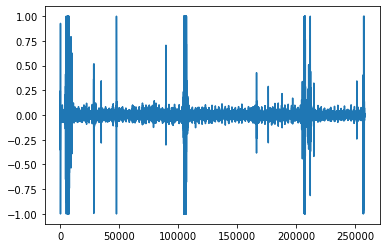

In [196]:
wav, label = librosa.load(fname, sr = 4000)
plt.plot(wav)

Looks like there exist high level of noisy signals?

Q: would it be nice to remove unrelevant noise?

In [143]:
x = librosa.load(fname,sr = 4000)[0]
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

High noise from position 0

In [239]:
pos1 = 0
ipd.Audio(x[pos1:(pos1+40000)], rate=4000)

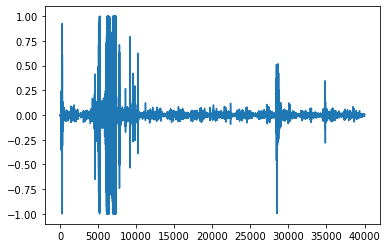

In [240]:
plt.plot(x[pos1:(pos1+40000)])

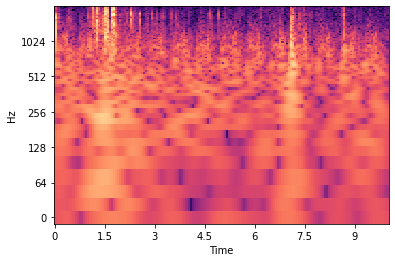

In [241]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x[pos1:(pos1+40000)], fmin = 50, hop_length=256)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

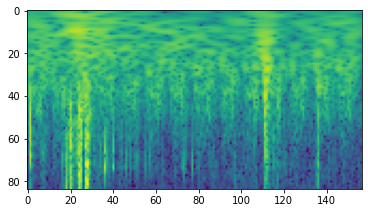

In [242]:
plt.imshow(S_db_hr)

start from position 13000

In [172]:
pos1 = 13000
ipd.Audio(x[pos1:(pos1+40000)], rate=4000)

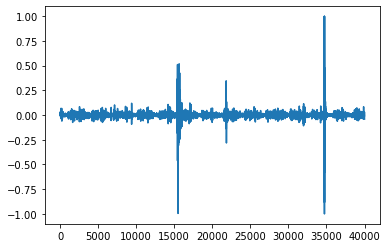

In [173]:
plt.plot(x[pos1:(pos1+40000)])

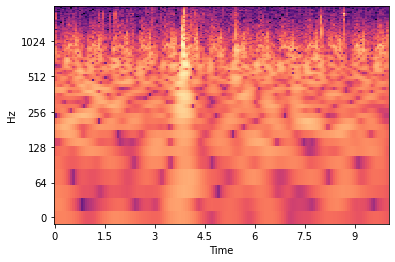

In [174]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x[pos1:(pos1+40000)], fmin = 50, hop_length=256)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

In [203]:
pos1 = 213000
ipd.Audio(x[pos1:(pos1+40000)], rate=4000)

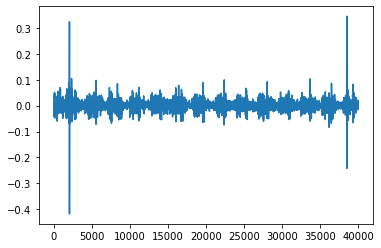

In [204]:
plt.plot(x[pos1:(pos1+40000)])

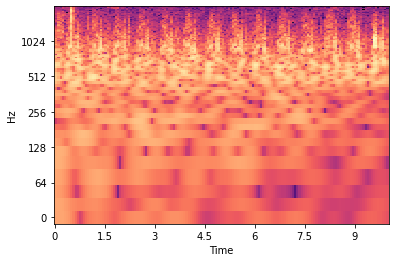

In [205]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x[pos1:(pos1+40000)], fmin = 50, hop_length=256)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

### Better region

This position looks better (w/o much noise)

In [235]:
pos1 = 110000
ipd.Audio(x[pos1:(pos1+40000)], rate=4000)

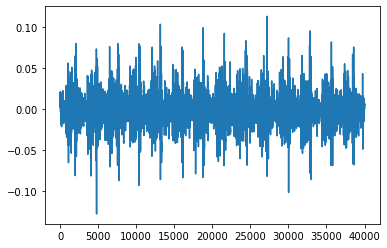

In [236]:
plt.plot(x[pos1:(pos1+40000)])

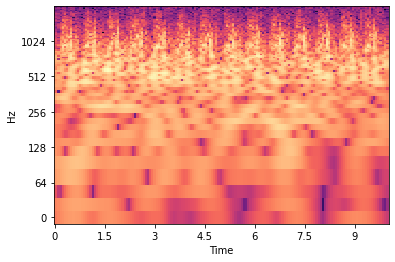

In [237]:
import numpy as np
import librosa.display

fig, ax = plt.subplots()
D_highres = librosa.cqt(x[pos1:(pos1+40000)], fmin = 50, hop_length=256)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres))
img = librosa.display.specshow(S_db_hr, sr = 4000, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)

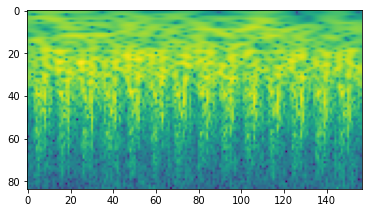

In [238]:
plt.imshow(S_db_hr)

In [206]:
len1

array([226851, 634688, 207094, ..., 439942, 587765, 436414])

In [213]:
wav, label = librosa.load(fname)


In [214]:
len1_sec = len1 / label

In [215]:
len1_sec

array([10.28802721, 28.78403628,  9.39201814, ..., 19.95201814,
       26.65600907, 19.79201814])

(array([ 179.,  453., 1177.,  442.,  824.,   65.,   12.,    3.,    2.,
           6.]),
 array([ 5.15201814, 11.08801814, 17.02401814, 22.96001814, 28.89601814,
        34.83201814, 40.76801814, 46.70401814, 52.64001814, 58.57601814,
        64.51201814]),
 <BarContainer object of 10 artists>)

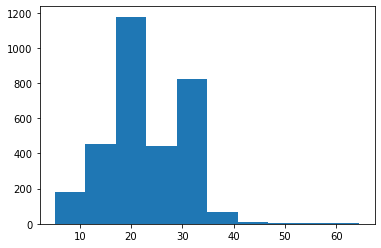

In [216]:
plt.hist(len1_sec)

In [219]:
len1_sec.mean()

22.87031895865101

In [222]:
np.median(len1_sec)

21.456009070294783

In [223]:
def feature_extract_melspec(fnm, samp_sec=20, sr = 4000, pre_emphasis = 0, hop_length=256, win_length = 512, n_mels = 100):

    data, sample_rate = librosa.load(fnm, sr = 4000)
    data = data * 1.0

    if samp_sec:
        if len(data) > sample_rate * samp_sec :
            n_samp = len(data) // int(sample_rate * samp_sec)
            signal = []
            for i in range(n_samp) :
                signal.append(data[ int(sample_rate * samp_sec)*i:(int(sample_rate * samp_sec)*(i+1))])
        else :
            n_samp = 1
            signal = np.zeros(int(sample_rate*samp_sec,))
            for i in range(int(sample_rate * samp_sec) // len(data)) :
                signal[(i)*len(data):(i+1)*len(data)] = data
            num_last = int(sample_rate * samp_sec) - len(data)*(i+1)
            signal[(i+1)*len(data):int(sample_rate * samp_sec)] = data[:num_last]
            signal = [signal]
    else:
        n_samp = 1
        signal = [data]

    Sig = []
    for i in range(n_samp) :
        if pre_emphasis :
            emphasized_signal = np.append(signal[i][0], signal[i][1:] - pre_emphasis * signal[i][:-1])
        else :
            emphasized_signal = signal[i]

        Sig.append(librosa.power_to_db(librosa.feature.melspectrogram(y=emphasized_signal, sr= sr, n_mels=n_mels, n_fft=win_length, hop_length=hop_length, win_length=win_length)))

    return Sig


In [224]:
fname = root_dir + '/training_data/' + fnms_wav[1133]
melspec = feature_extract_melspec(fname)

In [227]:
melspec[0].shape

(100, 313)

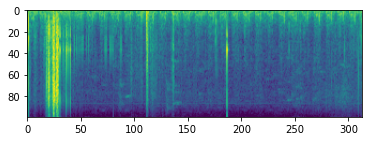

In [228]:
plt.imshow(melspec[0])

In [277]:
def feature_extract_stft(fnm, samp_sec=20, sr = 4000, pre_emphasis = 0, hop_length=256, win_length = 512, n_mels = 100):

    data, sample_rate = librosa.load(fnm, sr = sr)
    data = data * 1.0

    if samp_sec:
        if len(data) > sample_rate * samp_sec :
            n_samp = len(data) // int(sample_rate * samp_sec)
            signal = []
            for i in range(n_samp) :
                signal.append(data[ int(sample_rate * samp_sec)*i:(int(sample_rate * samp_sec)*(i+1))])
        else :
            n_samp = 1
            signal = np.zeros(int(sample_rate*samp_sec,))
            for i in range(int(sample_rate * samp_sec) // len(data)) :
                signal[(i)*len(data):(i+1)*len(data)] = data
            num_last = int(sample_rate * samp_sec) - len(data)*(i+1)
            signal[(i+1)*len(data):int(sample_rate * samp_sec)] = data[:num_last]
            signal = [signal]
    else:
        n_samp = 1
        signal = [data]

    Sig = []
    for i in range(n_samp) :
        if pre_emphasis :
            emphasized_signal = np.append(signal[i][0], signal[i][1:] - pre_emphasis * signal[i][:-1])
        else :
            emphasized_signal = signal[i]

#        D_highres = librosa.stft(emphasized_signal, hop_length=hop_length, n_fft=win_length)
#        S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
            
        Sig.append(librosa.power_to_db(np.abs(librosa.stft(emphasized_signal, n_fft=win_length, hop_length=hop_length, win_length=win_length))))

    return Sig


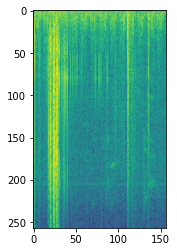

In [278]:
fname = root_dir + '/training_data/' + fnms_wav[1133]
stft1 = feature_extract_stft(fname, samp_sec=10)

plt.imshow(stft1[0])

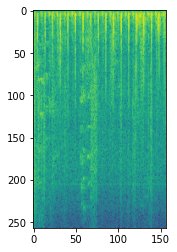

In [279]:
fname = root_dir + '/training_data/' + fnms_wav[0]
stft1 = feature_extract_stft(fname, samp_sec=10)

plt.imshow(stft1[0])

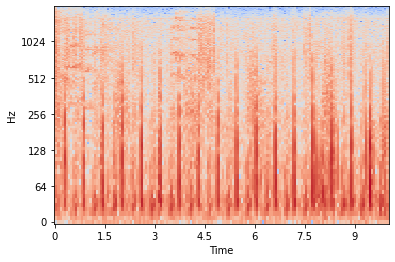

In [280]:
librosa.display.specshow(stft1[0], sr = 4000, hop_length=256, x_axis='time', y_axis='log')

In [281]:
stft1[0]

array([[-8.2816973e+00, -1.8036001e+01, -1.1291664e+01, ...,
        -8.2819405e+00, -7.5830421e+00, -7.3623729e+00],
       [-6.3414011e+00, -7.3045630e+00, -3.2665925e+00, ...,
        -2.1596823e+00, -1.0470147e+00, -2.2306429e-01],
       [-4.2506404e+00, -9.2573702e-01, -2.6106911e-02, ...,
         7.4951160e-01,  4.6689677e+00, -4.7834811e-01],
       ...,
       [-1.2462650e+01, -1.5411951e+01, -1.3636423e+01, ...,
        -2.8012430e+01, -2.4876900e+01, -2.4851618e+01],
       [-1.3252180e+01, -1.2315044e+01, -1.2887470e+01, ...,
        -2.7522364e+01, -2.6151506e+01, -2.4820593e+01],
       [-1.3644186e+01, -1.1224810e+01, -1.8577703e+01, ...,
        -2.9166830e+01, -3.0786848e+01, -2.8796701e+01]], dtype=float32)

In [282]:
stft1[0].max()

10.6009

In [283]:
stft1[0].min()

-43.42175

In [284]:
stft1[0].shape

(257, 157)

In [285]:
stft1_re = stft1[0].reshape(257*157, )

(array([6.0000e+00, 4.3000e+01, 4.5200e+02, 2.4700e+03, 5.9170e+03,
        1.3927e+04, 1.1718e+04, 4.3560e+03, 1.1470e+03, 3.1300e+02]),
 array([-43.42175   , -38.019485  , -32.617218  , -27.214954  ,
        -21.812689  , -16.410425  , -11.00816   ,  -5.605895  ,
         -0.20363006,   5.1986346 ,  10.6009    ], dtype=float32),
 <BarContainer object of 10 artists>)

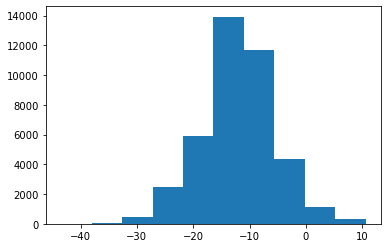

In [286]:
plt.hist(stft1_re)

In [311]:
import soundfile as sf

In [312]:
def feature_extract_cqt(fnm, samp_sec=20, sr = 4000, pre_emphasis = 0, filter_scale = 1, n_bins = 80, fmin = 10):

    data, sample_rate = sf.read(fnm, dtype = 'int16')
    #data, sample_rate = librosa.load(fnm, sr = sr)
    data = data * 1.0

    if samp_sec:
        if len(data) > sample_rate * samp_sec :
            n_samp = len(data) // int(sample_rate * samp_sec)
            signal = []
            for i in range(n_samp) :
                signal.append(data[ int(sample_rate * samp_sec)*i:(int(sample_rate * samp_sec)*(i+1))])
        else :
            n_samp = 1
            signal = np.zeros(int(sample_rate*samp_sec,))
            for i in range(int(sample_rate * samp_sec) // len(data)) :
                signal[(i)*len(data):(i+1)*len(data)] = data
            num_last = int(sample_rate * samp_sec) - len(data)*(i+1)
            signal[(i+1)*len(data):int(sample_rate * samp_sec)] = data[:num_last]
            signal = [signal]
    else:
        n_samp = 1
        signal = [data]

    Sig = []
    for i in range(n_samp) :
        if pre_emphasis :
            emphasized_signal = np.append(signal[i][0], signal[i][1:] - pre_emphasis * signal[i][:-1])
        else :
            emphasized_signal = signal[i]

#        D_highres = librosa.stft(emphasized_signal, hop_length=hop_length, n_fft=win_length)
#        S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
        Sig.append(np.abs(librosa.cqt(emphasized_signal, sr=sample_rate,
                                             filter_scale = filter_scale, n_bins=n_bins,
                                             fmin = fmin))+1)

    return Sig

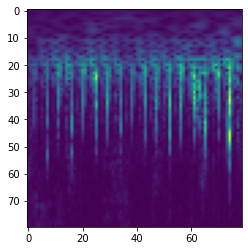

In [313]:
fname = root_dir + '/training_data/' + fnms_wav[0]
cqt1 = feature_extract_cqt(fname, samp_sec=10)

plt.imshow(cqt1[0])

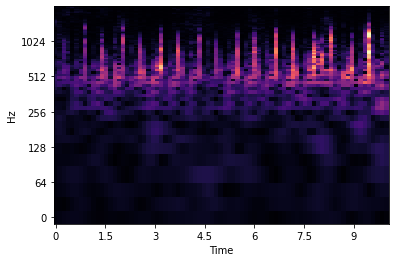

In [314]:
librosa.display.specshow(cqt1[0], sr = 4000, x_axis='time', y_axis='log')

In [315]:
cqt1[0]

array([[ 666.64671658,  851.74590884, 1039.03875145, ...,  449.56103525,
          16.90307526,  384.28859894],
       [ 464.93151431,  314.05592218,  234.79770946, ..., 1223.17729615,
        1135.49452197, 1019.05203082],
       [ 666.1440489 ,  815.61219145, 1005.07763838, ..., 1443.66830783,
        1791.37011023, 1813.11366559],
       ...,
       [ 567.90251075,  274.30328023,  324.31321327, ...,   43.22880438,
         173.93683651,  133.90660826],
       [ 828.69777799,  360.60134396,  253.99352539, ...,  175.19088281,
         118.58174965,  224.70450047],
       [ 759.09679226,  625.56918872,  200.10625758, ...,  213.68731294,
         311.16419617,  255.66298028]])

In [316]:
cqt1[0].max()

25779.41659504408

In [317]:
cqt1[0].min()

4.265087590351648

In [318]:
cqt1[0].shape

(80, 79)

In [319]:
cqt1_re = cqt1[0].reshape(80*79, )

(array([4299.,  896.,  465.,  277.,  191.,  101.,   49.,   24.,   11.,
           7.]),
 array([4.26508759e+00, 2.58178024e+03, 5.15929539e+03, 7.73681054e+03,
        1.03143257e+04, 1.28918408e+04, 1.54693560e+04, 1.80468711e+04,
        2.06243863e+04, 2.32019014e+04, 2.57794166e+04]),
 <BarContainer object of 10 artists>)

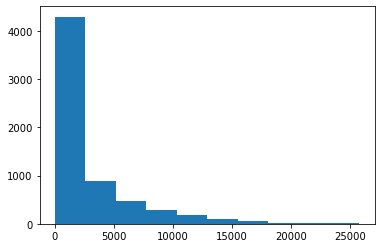

In [320]:
plt.hist(cqt1_re)

(array([1.000e+00, 2.000e+01, 8.100e+01, 4.450e+02, 9.590e+02, 1.167e+03,
        1.255e+03, 1.092e+03, 9.590e+02, 3.410e+02]),
 array([ 1.45046272,  2.32114961,  3.1918365 ,  4.0625234 ,  4.93321029,
         5.80389718,  6.67458407,  7.54527097,  8.41595786,  9.28664475,
        10.15733165]),
 <BarContainer object of 10 artists>)

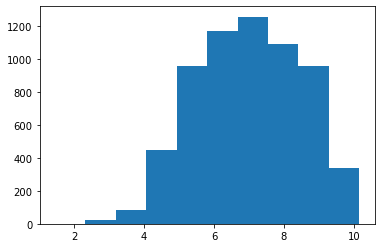

In [321]:
plt.hist(np.log(cqt1_re))

In [322]:
def feature_extract_cqt(fnm, samp_sec=20, sr = 4000, pre_emphasis = 0, filter_scale = 1, n_bins = 80, fmin = 10):

    data, sample_rate = sf.read(fnm, dtype = 'int16')
    #data, sample_rate = librosa.load(fnm, sr = sr)
    data = data * 1.0

    if samp_sec:
        if len(data) > sample_rate * samp_sec :
            n_samp = len(data) // int(sample_rate * samp_sec)
            signal = []
            for i in range(n_samp) :
                signal.append(data[ int(sample_rate * samp_sec)*i:(int(sample_rate * samp_sec)*(i+1))])
        else :
            n_samp = 1
            signal = np.zeros(int(sample_rate*samp_sec,))
            for i in range(int(sample_rate * samp_sec) // len(data)) :
                signal[(i)*len(data):(i+1)*len(data)] = data
            num_last = int(sample_rate * samp_sec) - len(data)*(i+1)
            signal[(i+1)*len(data):int(sample_rate * samp_sec)] = data[:num_last]
            signal = [signal]
    else:
        n_samp = 1
        signal = [data]

    Sig = []
    for i in range(n_samp) :
        if pre_emphasis :
            emphasized_signal = np.append(signal[i][0], signal[i][1:] - pre_emphasis * signal[i][:-1])
        else :
            emphasized_signal = signal[i]

#        D_highres = librosa.stft(emphasized_signal, hop_length=hop_length, n_fft=win_length)
#        S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
        Sig.append(np.log(np.abs(librosa.cqt(emphasized_signal, sr=sample_rate,
                                             filter_scale = filter_scale, n_bins=n_bins,
                                             fmin = fmin))+1) )

    return Sig

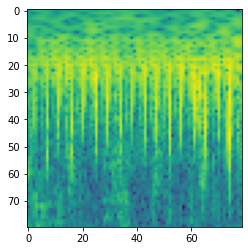

In [323]:
fname = root_dir + '/training_data/' + fnms_wav[0]
cqt1 = feature_extract_cqt(fname, samp_sec=10)

plt.imshow(cqt1[0])

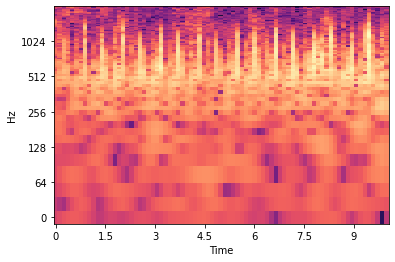

In [324]:
librosa.display.specshow(cqt1[0], sr = 4000, x_axis='time', y_axis='log')

In [325]:
cqt1[0].shape

(80, 79)

In [326]:
cqt1_re = cqt1[0].reshape(80*79, )

(array([1.000e+00, 2.000e+01, 8.100e+01, 4.450e+02, 9.590e+02, 1.167e+03,
        1.255e+03, 1.092e+03, 9.590e+02, 3.410e+02]),
 array([ 1.45046272,  2.32114961,  3.1918365 ,  4.0625234 ,  4.93321029,
         5.80389718,  6.67458407,  7.54527097,  8.41595786,  9.28664475,
        10.15733165]),
 <BarContainer object of 10 artists>)

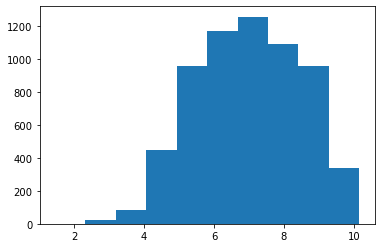

In [327]:
plt.hist(cqt1_re)